Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you
might choose one over the other.

Label Encoding:

Label Encoding involves assigning a unique numerical value to each unique category in a categorical feature.
For example, if you have a categorical feature like Color with categories Red, Green, and Blue, you could assign Red as 0, Green as 1, and Blue as 2.

The drawback of Label Encoding is that it implicitly assumes an ordinal relationship between the categories (i.e., an ordering or ranking), which may not exist.

Ordinal Encoding:

Ordinal Encoding also assigns numerical values to categorical data, but with a crucial difference: it explicitly defines the order (or rank) of the categories.

This encoding is suitable when the categorical values have a meaningful order. For example, in a feature like Size with categories Small, Medium, and Large, we might use Ordinal Encoding to assign Small as 0, Medium as 1, and Large as 2, reflecting their inherent order.

Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in
a machine learning project.

Target Guided Ordinal Encoding is a method of encoding categorical variables where the categories are ranked based on the target variable. This technique is particularly useful when dealing with classification tasks where the target variable is categorical. The goal is to transform categorical features into ordinal values that are ordered with respect to the target variable's mean or median value for each category.

Here's a step-by-step explanation of how Target Guided Ordinal Encoding works:

Calculate Target Statistics: For each category in the categorical feature, compute a statistical value (e.g., mean, median) of the target variable.

Order Categories: Sort the categories based on their corresponding statistical values. This ordering reflects the relationship between the categorical feature and the target variable.

Assign Ordinal Labels: Assign ordinal labels (numerical values) to the categories based on their order. The category with the lowest (or highest) statistical value may receive the lowest (or highest) label.

Replace Categories: Replace the original categorical values with the assigned ordinal labels.

In [8]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Education Level': ['High School', 'College', 'High School', 'Graduate', 'College', 'Graduate'],
    'Subscribed': [0, 1, 1, 0, 1, 0]  # Target variable (0 = Not Subscribed, 1 = Subscribed)
}

df = pd.DataFrame(data)

# Calculate mean of 'Subscribed' for each 'Education Level'
education_level_means = df.groupby('Education Level')['Subscribed'].mean().sort_values()

# Create mapping dictionary based on mean values
ordinal_mapping = {level: i for i, level in enumerate(education_level_means.index)}

# Map 'Education Level' to ordinal values
df['Education Level Encoded'] = df['Education Level'].map(ordinal_mapping)

print(df)


  Education Level  Subscribed  Education Level Encoded
0     High School           0                        1
1         College           1                        2
2     High School           1                        1
3        Graduate           0                        0
4         College           1                        2
5        Graduate           0                        0


Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?


Covariance Definition:

Covariance is a measure of how much two random variables change together. In statistical analysis, covariance indicates the degree to which two variables tend to vary together. If the covariance between two variables is positive, it means that when one variable increases, the other variable tends to increase as well. Conversely, if the covariance is negative, it indicates that as one variable increases, the other tends to decrease.

Importance of Covariance in Statistical Analysis:

Covariance is important in statistical analysis for several reasons:

Relationship between Variables: Covariance provides insights into the relationship between two variables. A positive covariance indicates a positive relationship (both variables move in the same direction), while a negative covariance indicates an inverse relationship (variables move in opposite directions).

Scale of Variability: Covariance is a measure of the scale of variability between variables. Larger covariances indicate stronger relationships, whereas smaller covariances suggest weaker relationships.

Used in Calculating Correlation: Covariance is used to calculate correlation coefficients, such as Pearson's correlation coefficient. Correlation coefficients normalize covariance values to provide a standardized measure of the relationship between variables, which is useful for comparing different datasets.

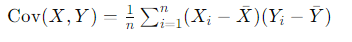

Where,

Xi  is the values of the X-variable

Yi is the values of the Y-variable

X is the mean of the X-variable

Y is the mean of the Y-variable

n is the number of data points

Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,
large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.
Show your code and explain the output.

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a sample DataFrame with categorical variables
data = {
    'Color': ['red', 'green', 'blue', 'red', 'green'],
    'Size': ['small', 'medium', 'large', 'medium', 'small'],
    'Material': ['wood', 'metal', 'plastic', 'metal', 'plastic']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])
df['Size_Encoded'] = label_encoder.fit_transform(df['Size'])
df['Material_Encoded'] = label_encoder.fit_transform(df['Material'])

print("\nDataFrame after Label Encoding:")
print(df)


Original DataFrame:
   Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red  medium    metal
4  green   small  plastic

DataFrame after Label Encoding:
   Color    Size Material  Color_Encoded  Size_Encoded  Material_Encoded
0    red   small     wood              2             2                 2
1  green  medium    metal              1             1                 0
2   blue   large  plastic              0             0                 1
3    red  medium    metal              2             1                 0
4  green   small  plastic              1             2                 1


Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education
level. Interpret the results.

In [11]:
import numpy as np
import pandas as pd

# Create a sample DataFrame with Age, Income, and Education level
data = {
    'Age': [30, 40, 25, 35, 28],
    'Income': [50000, 70000, 40000, 60000, 45000],
    'Education Level': ['Bachelor', 'Master', 'Bachelor', 'PhD', 'Bachelor']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Calculate covariance matrix using NumPy
cov_matrix = np.cov(df[['Age', 'Income']].T)

print("\nCovariance Matrix:")
print(cov_matrix)


Original DataFrame:
   Age  Income Education Level
0   30   50000        Bachelor
1   40   70000          Master
2   25   40000        Bachelor
3   35   60000             PhD
4   28   45000        Bachelor

Covariance Matrix:
[[3.53e+01 7.15e+04]
 [7.15e+04 1.45e+08]]


Q6. You are working on a machine learning project with a dataset containing several categorical
variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD),
and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for
each variable, and why?

Gender (Binary Categorical Variable - Nominal):

Encoding Method: One-Hot Encoding
Why?: Gender has two distinct categories (Male/Female), and there is no ordinal relationship between them. One-Hot Encoding will create two binary (0/1) columns (Gender_Male and Gender_Female), representing the presence or absence of each category. This method is suitable for nominal categorical variables without an inherent order.

Education Level (Multi-Class Categorical Variable - Ordinal):

Encoding Method: Ordinal Encoding
Why?: Education Level represents a categorical variable with a clear ordinal relationship (e.g., High School < Bachelor's < Master's < PhD). Ordinal Encoding assigns numerical labels based on the natural order of categories. This method preserves the ordinal relationship in the data.

Employment Status (Multi-Class Categorical Variable - Nominal):

Encoding Method: One-Hot Encoding
Why?: Employment Status has multiple categories (Unemployed, Part-Time, Full-Time) without a clear ordinal relationship. Using One-Hot Encoding will create separate binary columns for each category, capturing the presence or absence of each status independently.

Additional Considerations:

Label Encoding vs. One-Hot Encoding: Label Encoding should be avoided for categorical variables like "Education Level" because it may imply false ordinal relationships. One-Hot Encoding is preferred for nominal variables to avoid such misconceptions.

Sparse Matrix: One-Hot Encoding can result in a sparse matrix with many columns, which can impact the model's performance and computational efficiency. However, it accurately represents the categorical variables without imposing any ordinal relationship.

Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two
categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/
East/West). Calculate the covariance between each pair of variables and interpret the results.

To calculate the covariance between pairs of variables in a dataset with both continuous (Temperature, Humidity) and categorical (Weather Condition, Wind Direction) variables, we need to consider how covariance applies to different types of data.

Covariance is a measure of the relationship between two variables. It indicates whether the variables change together (positive covariance), change in opposite directions (negative covariance), or are independent (covariance near zero).

Continuous Variables:

Temperature

Humidity

Categorical Variables:

Weather Condition (Sunny/Cloudy/Rainy)

Wind Direction (North/South/East/West)

In [13]:
import pandas as pd

# Sample data (replace with your actual dataset)
data = {
    'Temperature': [25, 30, 22, 28, 26],
    'Humidity': [60, 55, 70, 50, 65],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East', 'West', 'North']
}

df = pd.DataFrame(data)

# Calculate covariance between Temperature and Humidity
cov_temp_humidity = df['Temperature'].cov(df['Humidity'])
print(f"Covariance between Temperature and Humidity: {cov_temp_humidity}")


import pandas as pd

# Sample data (replace with your actual dataset)
data = {
    'Temperature': [25, 30, 22, 28, 26],
    'Humidity': [60, 55, 70, 50, 65],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East', 'West', 'North']
}

df = pd.DataFrame(data)

# Calculate covariance between Temperature and Humidity
cov_temp_humidity = df['Temperature'].cov(df['Humidity'])
print(f"Covariance between Temperature and Humidity: {cov_temp_humidity}")


Covariance between Temperature and Humidity: -20.0
